# Biometric Systems - Laboratory 1

In [4]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

# List of image files
image_files = ['TestImages/bird.gif', 'TestImages/camera.gif', 'TestImages/lena.gif', 
               'TestImages/squares.gif', 'TestImages/peppers_gray.tif', 
               'TestImages/101_1.tif', 'TestImages/101_2.tif', 'TestImages/101_3.tif']

# Workspace setup
sns.set_palette("viridis")


In [5]:
def load_image(image_path):
    """
    Loads an image from the given path and converts it to grayscale.
    """    
    if image_path.endswith('.gif'):
        with Image.open(image_path) as img:
            img = img.convert('L')
            image = np.array(img)
    else:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None:
        raise ValueError(f"Failed to load image: {image_path}")
    
    return image

## Image Basics
### `image_information` Function
This function performs the following operations on a grayscale image:
1. Displays the image and its histogram.
2. Computes the contrast.
3. Computes the entropy and average intensity.

In [6]:
def image_information(image_path):
    # Load the image
    image = load_image(image_path)
    
    # Compute histogram
    hist = cv2.calcHist([image], [0], None, [256], [0, 256])
    
    # Compute contrast (standard deviation of pixel intensities)
    contrast = np.std(image)
    
    # Compute entropy
    hist_normalized = hist / np.sum(hist)
    image_entropy = entropy(hist_normalized, base=2)
    
    # Compute average intensity
    average_intensity = np.mean(image)
    
    # Display image and histogram
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title('Image')
    plt.imshow(image, cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title('Histogram')
    sns.lineplot(x=np.arange(256), y=hist.ravel())
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()
    
    # Print image information below the plots
    print(f"Image: {image_path}")
    print(f"Contrast: {contrast:.2f}")
    print(f"Entropy: {image_entropy[0]:.2f}")
    print(f"Average Intensity: {average_intensity:.2f}")
    print('-' * 50)
    
    return contrast, image_entropy, average_intensity

### Experimental Results
Applying `image_information` to three selected images from the database.

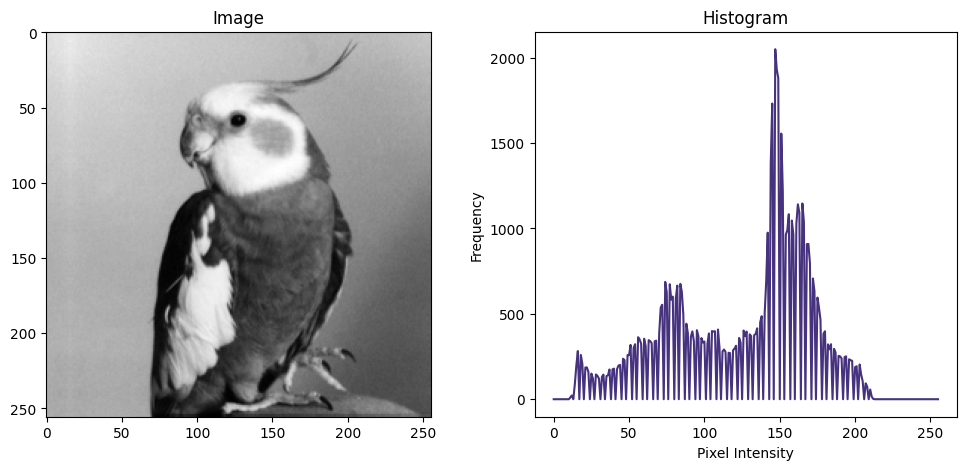

Image: TestImages/bird.gif
Contrast: 46.01
Entropy: 6.77
Average Intensity: 125.39
--------------------------------------------------


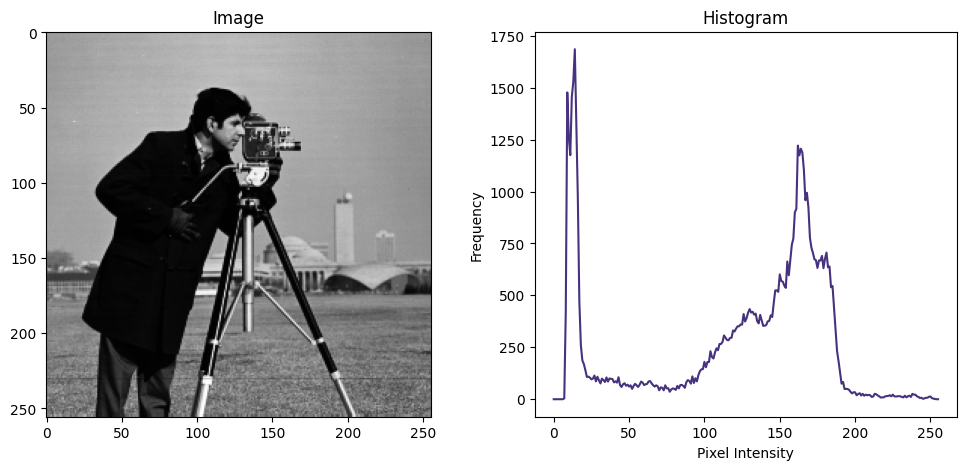

Image: TestImages/camera.gif
Contrast: 62.34
Entropy: 7.01
Average Intensity: 118.72
--------------------------------------------------


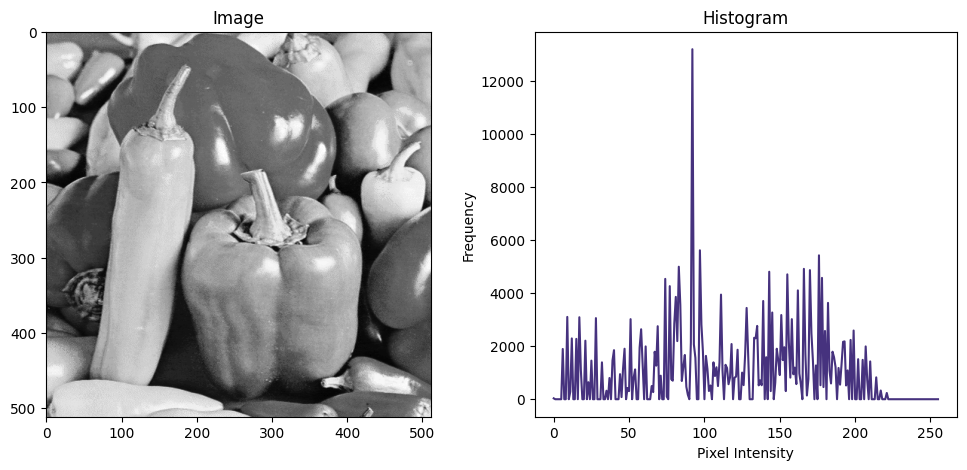

Image: TestImages/peppers_gray.tif
Contrast: 53.70
Entropy: 6.76
Average Intensity: 116.91
--------------------------------------------------


In [8]:
results = {}
test_images = [0, 1, 4]
for idx in test_images:
    img_path = image_files[idx]
    contrast, img_entropy, avg_intensity = image_information(img_path)
    results[img_path] = {
        'Contrast': float(contrast),
        'Entropy': float(img_entropy[0]),
        'Average Intensity': float(avg_intensity)
    }

#### Comment
The bird image has a moderate contrast (46.01) and entropy (6.77), with balanced brightness (125.39), suggesting reasonable detail and texture. The camera image shows higher contrast (62.34) and entropy (7.01), reflecting rich details and diversity, though slightly darker (118.72). The peppers image balances contrast (53.70) and entropy (6.76) with the darkest brightness (116.91). The camera image exhibits the highest contrast and entropy, consistent with the detailed and complex scene it depicts. The bird and peppers images share similar entropy levels but differ in brightness and contrast, highlighting the unique features of their respective content.

## Logical and Arithmetic Operations
### `logical_operations` Function
This function applies the AND or OR logical operations between two input grayscale images and outputs the resulting image.

In [9]:
def logical_operations(image1_path, image2_path, operation='AND'):
    # Load the images
    img1 = load_image(image1_path)
    img2 = load_image(image2_path)
    
    # Perform the logical operation
    if operation == 'AND':
        result = cv2.bitwise_and(img1, img2)
    elif operation == 'OR':
        result = cv2.bitwise_or(img1, img2)
    else:
        raise ValueError("Invalid operation. Use 'AND' or 'OR'.")
    
    return result

### `sum_images` Function
This function sums two input grayscale images and outputs the resulting image.

In [10]:
def sum_images(image1_path, image2_path):
    # Load the images
    img1 = load_image(image1_path)
    img2 = load_image(image2_path)
    
    # Sum the images
    return cv2.add(img1, img2)

### Experimental Results for Logical and Arithmetic Operations

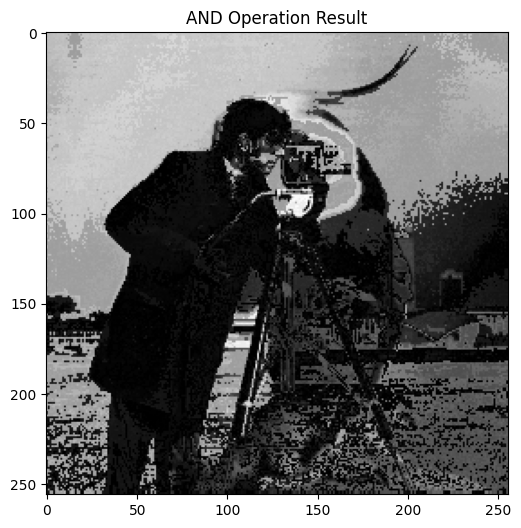

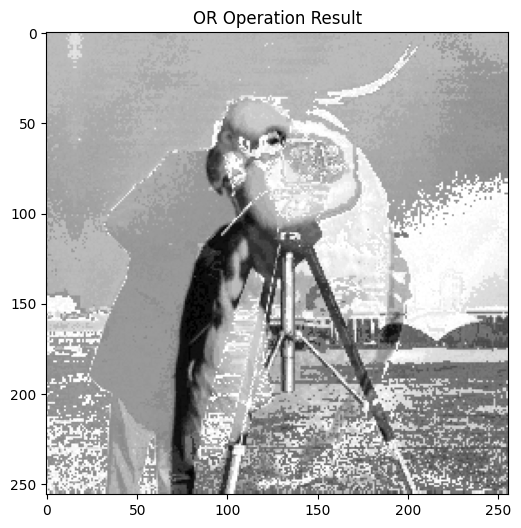

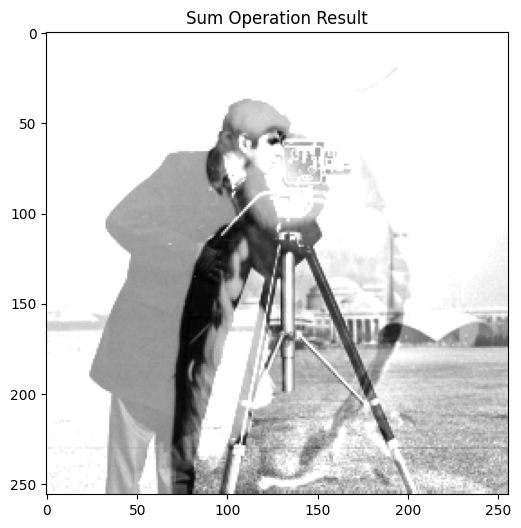

In [11]:
# Select test images
image1_path = image_files[0]  # Example: 'TestImages/bird.gif'
image2_path = image_files[1]  # Example: 'TestImages/camera.gif'

# Perform AND operation
and_result = logical_operations(image1_path, image2_path, operation='AND')
plt.figure(figsize=(6, 6))
plt.title('AND Operation Result')
plt.imshow(and_result, cmap='gray')
plt.show()

# Perform OR operation
or_result = logical_operations(image1_path, image2_path, operation='OR')
plt.figure(figsize=(6, 6))
plt.title('OR Operation Result')
plt.imshow(or_result, cmap='gray')
plt.show()

# Perform Sum operation
sum_result = sum_images(image1_path, image2_path)
plt.figure(figsize=(6, 6))
plt.title('Sum Operation Result')
plt.imshow(sum_result, cmap='gray')
plt.show()

#### Comment
The AND operation produces a darker image by combining overlapping areas with shared low intensity values. This results in a high-contrast composite image, emphasizing darker regions. The OR operation creates a lighter image by merging brighter pixel values from both images, blending the details into a smoother output. The SUM operation adds the pixel intensities from both images, resulting in a very bright or overexposed image, where details in high-intensity areas may be lost.

## Thresholding Functions
### `binarize_image` Function
This function performs binary thresholding on an input grayscale image.

In [14]:
def binarize_image_otsu(image_path):
    # Load the image
    image = load_image(image_path)
    
    # Apply Otsu's thresholding
    _, binary_image = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    
    return binary_image

### Experimental Results for Thresholding

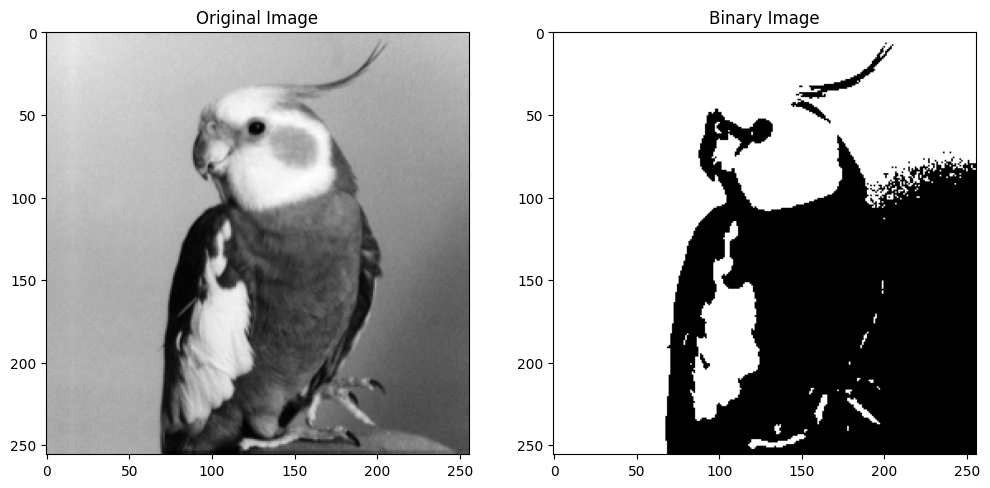

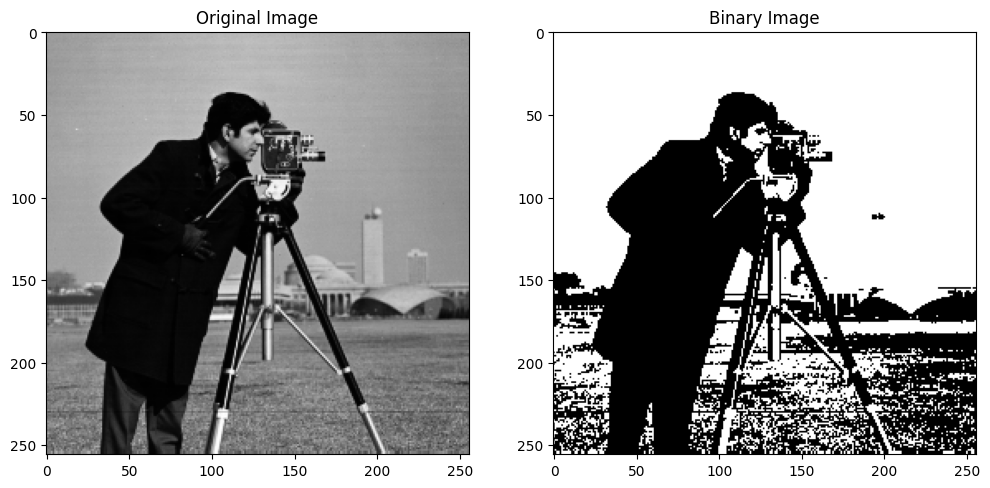

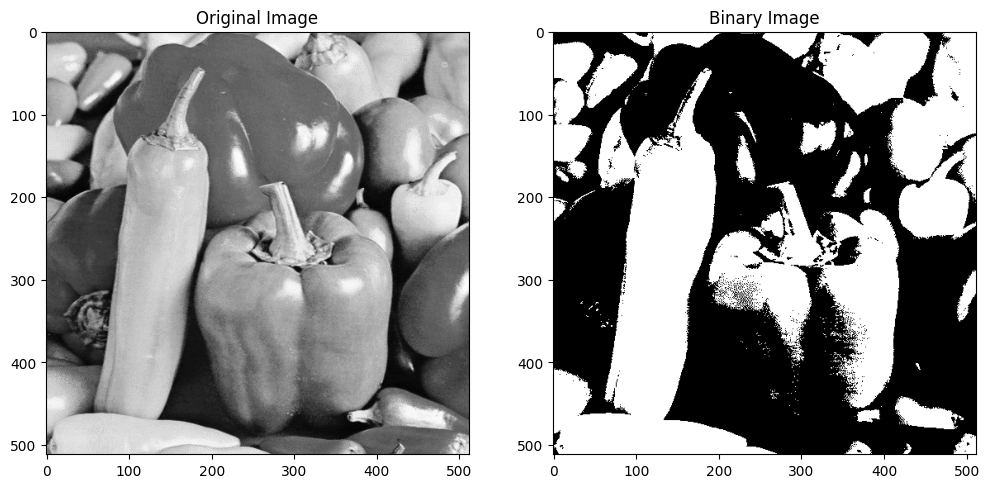

In [15]:
# Select test images
test_images = [0, 1, 4]
threshold = 128
results = {}

for idx in test_images:
    img_path = image_files[idx]
    binary_image = binarize_image(img_path, threshold=threshold)
    
    # Save the result
    results[img_path] = binary_image
    
    # Display the original and binary images
    plt.figure(figsize=(12, 6))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(load_image(img_path), cmap='gray')
    
    # Binary Image
    plt.subplot(1, 2, 2)
    plt.title('Binary Image')
    plt.imshow(binary_image, cmap='gray')
    
    plt.show()

#### Comment
The binary images created using Otsu's method effectively separate the key objects from the background in all three cases. 

For the bird image, the bird's shape and details are highlighted well in black and white, though some noise is visible in the background due to intensity variations in the original image.

In the camera image, the photographer and the camera are clearly segmented, but some background elements, like the structures, remain partially visible. This occurs because the intensity values of the background and foreground overlap in the original image.

For the peppers image, the binary output captures the peppers' shapes and textures effectively, creating strong contrasts between the objects and the background. However, some finer details in darker areas may be lost due to the sharp thresholding process.

Overall, Otsu's binarization performs well in segmenting the main objects but may introduce minor noise or lose details depending on the intensity distributions in the original images.